In [2]:
import pandas as pd

In [3]:
df = pd.read_csv("dataset/Electric_Vehicle_Population_Data.csv")
print(f"Shape {df.shape}")
print()
print(df.info())

Shape (250659, 17)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250659 entries, 0 to 250658
Data columns (total 17 columns):
 #   Column                                             Non-Null Count   Dtype  
---  ------                                             --------------   -----  
 0   VIN (1-10)                                         250659 non-null  object 
 1   County                                             250653 non-null  object 
 2   City                                               250653 non-null  object 
 3   State                                              250659 non-null  object 
 4   Postal Code                                        250653 non-null  float64
 5   Model Year                                         250659 non-null  int64  
 6   Make                                               250659 non-null  object 
 7   Model                                              250659 non-null  object 
 8   Electric Vehicle Type                              250

In [4]:
print(df.head(10))

   VIN (1-10)     County               City State  Postal Code  Model Year  \
0  5YJSA1E65N     Yakima            Granger    WA      98932.0        2022   
1  KNDC3DLC5N     Yakima             Yakima    WA      98902.0        2022   
2  5YJYGDEEXL  Snohomish            Everett    WA      98208.0        2020   
3  3C3CFFGE1G     Yakima             Yakima    WA      98908.0        2016   
4  KNDCC3LD5K     Kitsap          Bremerton    WA      98312.0        2019   
5  5YJXCAE29L     Kitsap         Silverdale    WA      98383.0        2020   
6  5YJ3E1EB6L       King               Kent    WA      98030.0        2020   
7  JTDKN3DP9F     Kitsap  Bainbridge Island    WA      98110.0        2015   
8  1G1FY6S07L     Kitsap       Port Orchard    WA      98367.0        2020   
9  1G1RD6S55K     Yakima             Yakima    WA      98908.0        2019   

        Make    Model                   Electric Vehicle Type  \
0      TESLA  MODEL S          Battery Electric Vehicle (BEV)   
1        KI

In [5]:
print(df.describe())

         Postal Code     Model Year  Electric Range      Base MSRP  \
count  250653.000000  250659.000000   250638.000000  250638.000000   
mean    98176.796089    2021.628252       44.073002     727.403107   
std      2555.064640       3.021254       82.412875    6917.315299   
min      1731.000000    2000.000000        0.000000       0.000000   
25%     98052.000000    2020.000000        0.000000       0.000000   
50%     98126.000000    2023.000000        0.000000       0.000000   
75%     98382.000000    2024.000000       37.000000       0.000000   
max     99577.000000    2026.000000      337.000000  845000.000000   

       Legislative District  DOL Vehicle ID  2020 Census Tract  
count         250076.000000    2.506590e+05       2.506530e+05  
mean              28.994994    2.392132e+08       5.297386e+10  
std               14.862288    6.671019e+07       1.618543e+09  
min                1.000000    4.385000e+03       1.001020e+09  
25%               18.000000    2.111858e+08 

In [6]:
print(df.isnull().sum())

VIN (1-10)                                             0
County                                                 6
City                                                   6
State                                                  0
Postal Code                                            6
Model Year                                             0
Make                                                   0
Model                                                  0
Electric Vehicle Type                                  0
Clean Alternative Fuel Vehicle (CAFV) Eligibility      0
Electric Range                                        21
Base MSRP                                             21
Legislative District                                 583
DOL Vehicle ID                                         0
Vehicle Location                                      14
Electric Utility                                       6
2020 Census Tract                                      6
dtype: int64


In [7]:
print("Jumlah duplikat:", df.duplicated().sum())

Jumlah duplikat: 0


In [8]:
df['Postal Code'] = df['Postal Code'].fillna("Unknown")
df['County'] = df['County'].fillna("Unknown")
df['City'] = df['City'].fillna("Unknown")
df['Electric Range'] = df['Electric Range'].fillna(df['Electric Range'].median())
df['Base MSRP'] = df['Base MSRP'].fillna(0)
df['Legislative District'] = df['Legislative District'].fillna(df['Legislative District'].median())
df['Vehicle Location'] = df['Vehicle Location'].fillna(df['City'])
df['Electric Utility'] = df['Electric Utility'].fillna("Unknown")
df['2020 Census Tract'] = df['2020 Census Tract'].fillna("Unknown")

In [9]:
print(df.isnull().sum())

VIN (1-10)                                           0
County                                               0
City                                                 0
State                                                0
Postal Code                                          0
Model Year                                           0
Make                                                 0
Model                                                0
Electric Vehicle Type                                0
Clean Alternative Fuel Vehicle (CAFV) Eligibility    0
Electric Range                                       0
Base MSRP                                            0
Legislative District                                 0
DOL Vehicle ID                                       0
Vehicle Location                                     0
Electric Utility                                     0
2020 Census Tract                                    0
dtype: int64


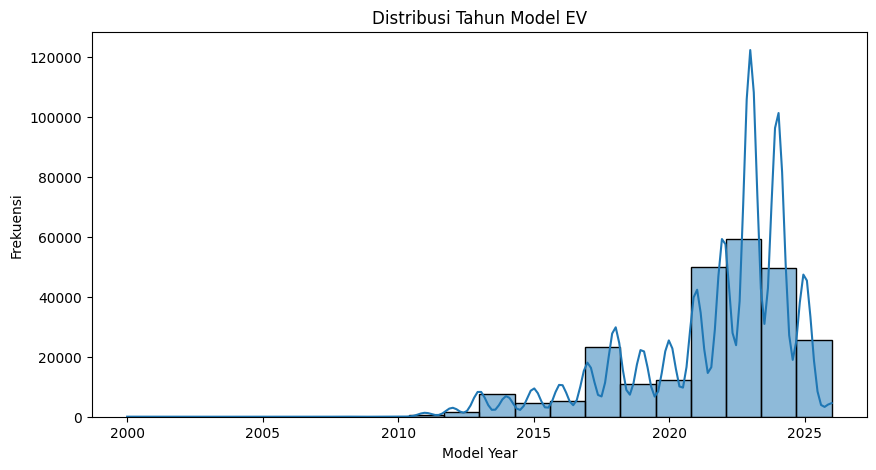

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['Model Year'], bins=20, kde=True,)
plt.title("Distribusi Tahun Model EV")
plt.xlabel("Model Year")
plt.ylabel("Frekuensi")
plt.show()

Make
TESLA            105253
CHEVROLET         18223
NISSAN            16085
FORD              13492
KIA               12171
BMW               10551
TOYOTA            10429
HYUNDAI            8328
RIVIAN             7637
VOLVO              6570
VOLKSWAGEN         6478
JEEP               6368
AUDI               4590
CHRYSLER           3587
MERCEDES-BENZ      2816
Name: count, dtype: int64


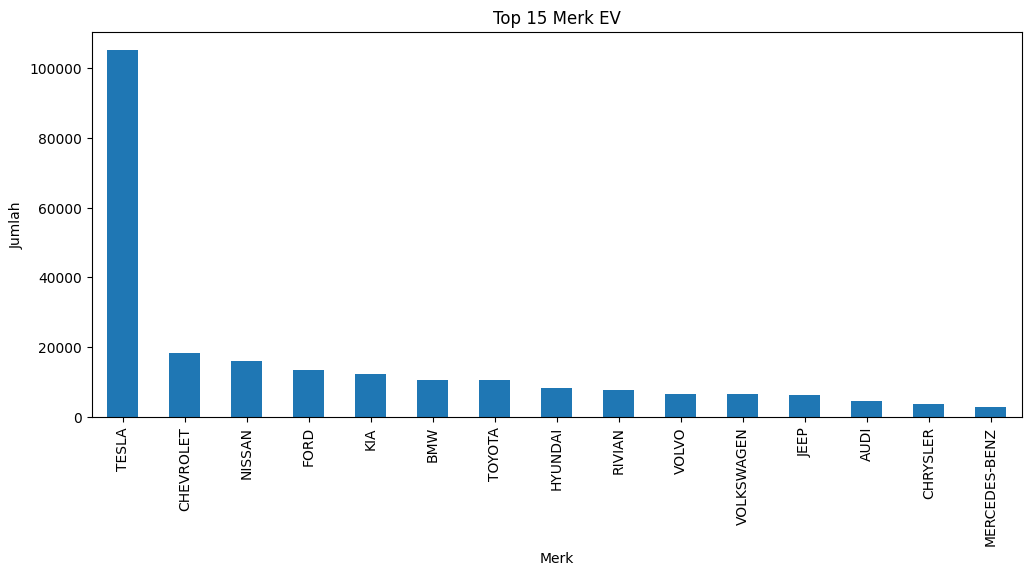

In [11]:
plt.figure(figsize=(12,5))
print(df['Make'].value_counts().head(15))
df['Make'].value_counts().head(15).sort_values(ascending=False).plot(kind='bar')
plt.title("Top 15 Merk EV")
plt.xlabel("Merk")
plt.ylabel("Jumlah")
plt.show()

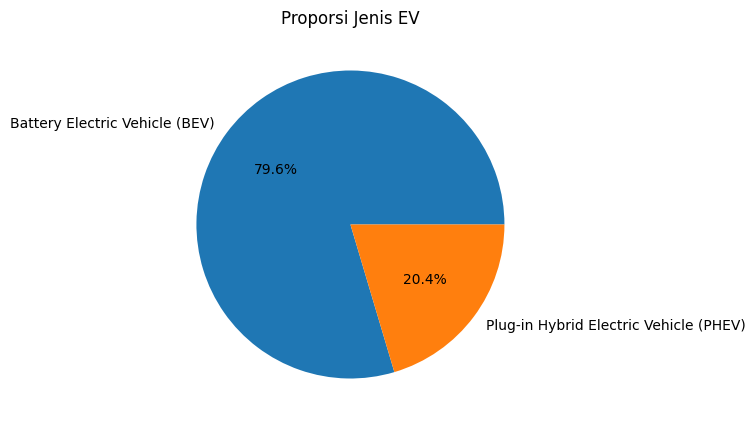

In [12]:
plt.figure(figsize=(6,5))
df['Electric Vehicle Type'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Proporsi Jenis EV")
plt.ylabel("")
plt.show()

## Bivariate Analysis ##

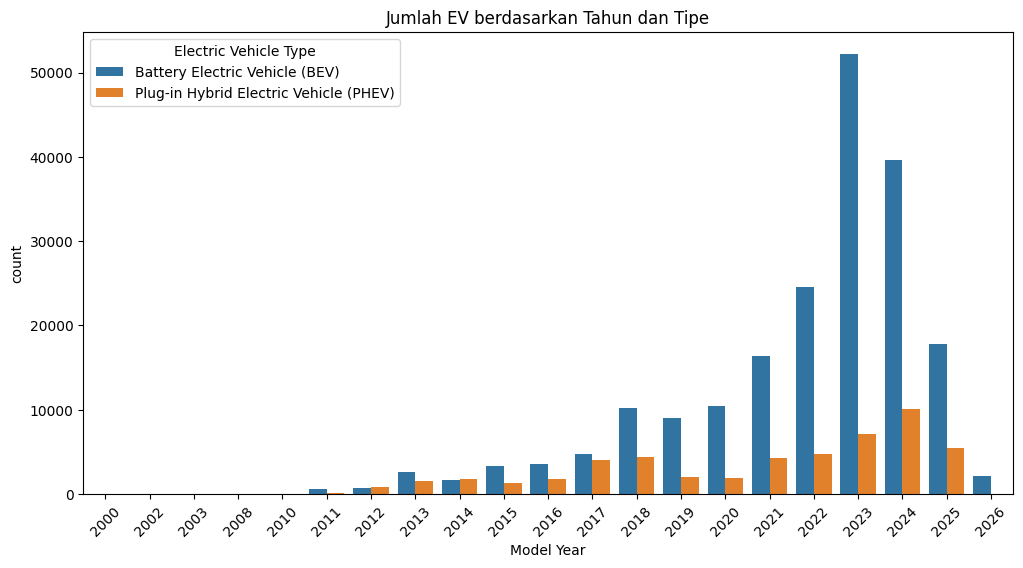

In [17]:
plt.figure(figsize=(12,6))
sns.countplot(data=df, x="Model Year", hue="Electric Vehicle Type")
plt.title("Jumlah EV berdasarkan Tahun dan Tipe")
plt.xticks(rotation=45)
plt.show()

Index(['TESLA', 'CHEVROLET', 'NISSAN', 'FORD', 'KIA', 'BMW', 'TOYOTA',
       'HYUNDAI', 'RIVIAN', 'VOLVO'],
      dtype='object', name='Make')


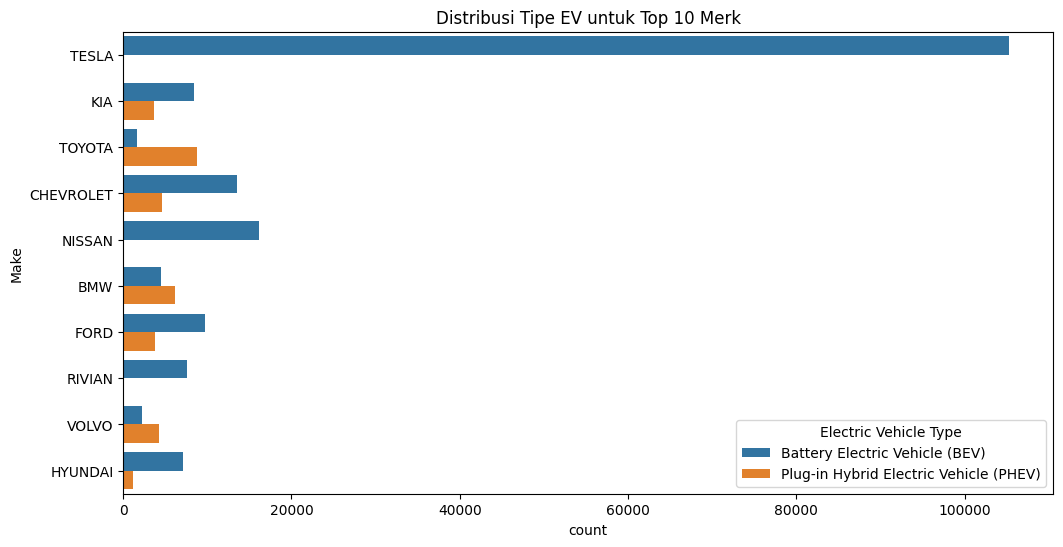

In [23]:
top_makes = df['Make'].value_counts().head(10).index
print(top_makes)
plt.figure(figsize=(12,6))
sns.countplot(data=df[df['Make'].isin(top_makes)], y="Make", hue="Electric Vehicle Type")
plt.title("Distribusi Tipe EV untuk Top 10 Merk")
plt.show()

In [24]:
print(df[df['Make'].isin(top_makes)])

        VIN (1-10)     County         City State Postal Code  Model Year  \
0       5YJSA1E65N     Yakima      Granger    WA     98932.0        2022   
1       KNDC3DLC5N     Yakima       Yakima    WA     98902.0        2022   
2       5YJYGDEEXL  Snohomish      Everett    WA     98208.0        2020   
4       KNDCC3LD5K     Kitsap    Bremerton    WA     98312.0        2019   
5       5YJXCAE29L     Kitsap   Silverdale    WA     98383.0        2020   
...            ...        ...          ...   ...         ...         ...   
250652  1N4AZ0CP5D     Kitsap    Bremerton    WA     98310.0        2013   
250654  7SAYGDEE7S   Franklin        Pasco    WA     99301.0        2025   
250656  7SAYGDEF6P     Pierce  Bonney Lake    WA     98391.0        2023   
250657  WBY8P6C54K       King      Seattle    WA     98117.0        2019   
250658  JTMAB3FV8P  Klickitat   Goldendale    WA     98620.0        2023   

          Make              Model                   Electric Vehicle Type  \
0        T

In [25]:
print(df)

        VIN (1-10)     County         City State Postal Code  Model Year  \
0       5YJSA1E65N     Yakima      Granger    WA     98932.0        2022   
1       KNDC3DLC5N     Yakima       Yakima    WA     98902.0        2022   
2       5YJYGDEEXL  Snohomish      Everett    WA     98208.0        2020   
3       3C3CFFGE1G     Yakima       Yakima    WA     98908.0        2016   
4       KNDCC3LD5K     Kitsap    Bremerton    WA     98312.0        2019   
...            ...        ...          ...   ...         ...         ...   
250654  7SAYGDEE7S   Franklin        Pasco    WA     99301.0        2025   
250655  2C4RC1L77J     Pierce       Tacoma    WA     98407.0        2018   
250656  7SAYGDEF6P     Pierce  Bonney Lake    WA     98391.0        2023   
250657  WBY8P6C54K       King      Seattle    WA     98117.0        2019   
250658  JTMAB3FV8P  Klickitat   Goldendale    WA     98620.0        2023   

            Make              Model                   Electric Vehicle Type  \
0       

## Multivariate Analysis ##

Index(['King', 'Snohomish', 'Pierce', 'Clark', 'Thurston'], dtype='object', name='County')

County       Clark     King  Pierce  Snohomish  Thurston
Model Year                                              
2000           0.0      4.0     0.0        0.0       1.0
2002           0.0      1.0     0.0        0.0       0.0
2008           0.0     10.0     2.0        1.0       0.0
2010           1.0     14.0     2.0        2.0       1.0
2011          36.0    260.0    62.0       58.0      32.0
2012         118.0    490.0   139.0      142.0      65.0
2013         288.0   1694.0   355.0      490.0     198.0
2014         198.0   1413.0   308.0      383.0     146.0
2015         294.0   2064.0   376.0      508.0     193.0
2016         319.0   2492.0   453.0      550.0     210.0
2017         593.0   3854.0   777.0      877.0     500.0
2018         835.0   7350.0  1156.0     1634.0     513.0
2019         652.0   5384.0   871.0     1234.0     467.0
2020         761.0   5959.0  1037.0     1443.0     46

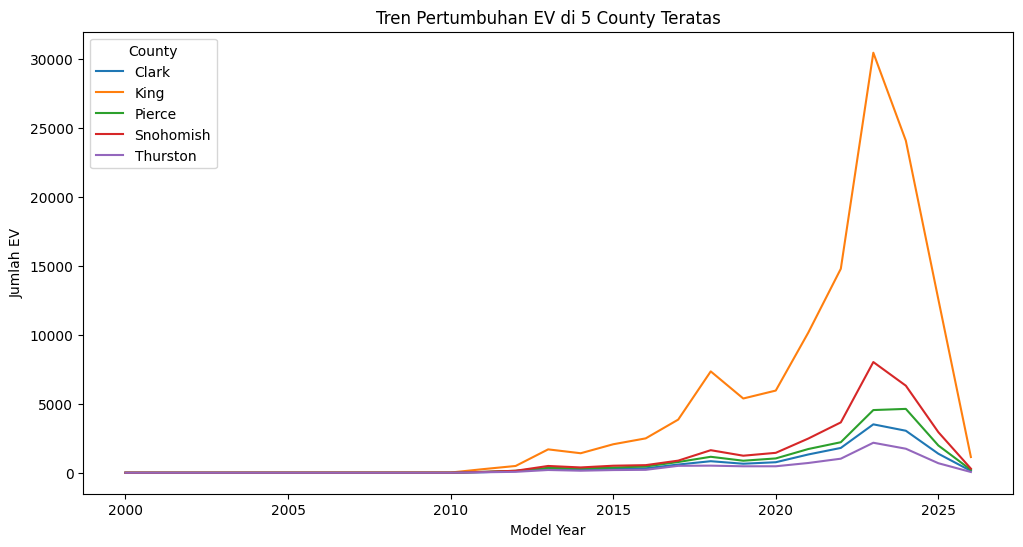

In [27]:
top_counties = df['County'].value_counts().head(5).index
print(top_counties)
print()
pivot_table = df[df['County'].isin(top_counties)].pivot_table(
    index="Model Year", columns="County", values="VIN (1-10)", aggfunc="count"
).fillna(0)
print(pivot_table)
pivot_table.plot(figsize=(12,6))
plt.title("Tren Pertumbuhan EV di 5 County Teratas")
plt.ylabel("Jumlah EV")
plt.show()

## Correlation Analysis

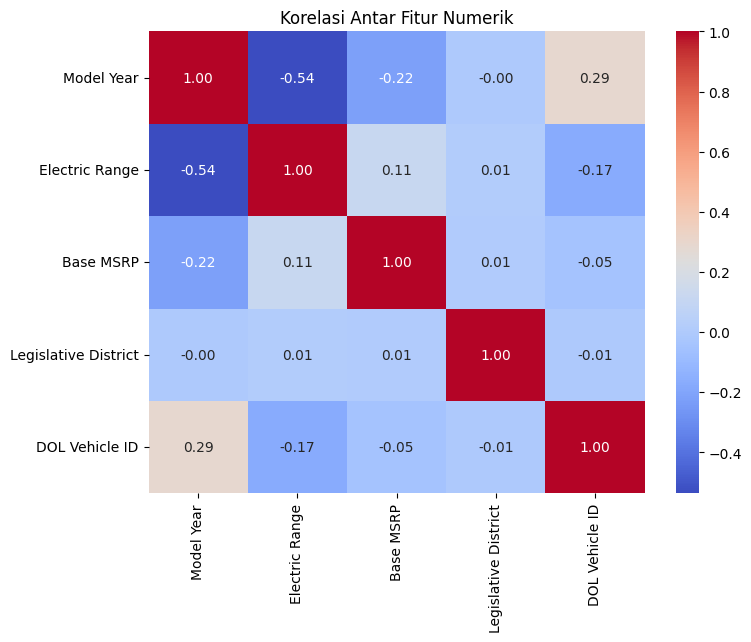

In [16]:
num_cols = df.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(8,6))
sns.heatmap(num_cols.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Korelasi Antar Fitur Numerik")
plt.show()